In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import inventorize3 as inv

In [4]:
retail = pd.read_csv('online_retail2.csv')
retail = retail.drop_duplicates()
retail = retail.dropna()
retail = retail[retail.Quantity > 0]

In [5]:
retail_clean = retail.copy()
retail_clean['Revenue'] = retail['Price'] * retail['Quantity']

In [6]:
retail_clean.to_csv('retail_clean.csv')
retail_clean.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')

In [7]:
grouped= retail_clean.groupby('Description').agg(total_sales=('Quantity',np.sum),
                                                             total_revenue=('Revenue',np.sum)).reset_index()

In [8]:
grouped.to_csv('for_abc.csv')

In [10]:
grouped.columns

Index(['Description', 'total_sales', 'total_revenue'], dtype='object')

In [14]:
a = inv.ABC(grouped[['Description','total_sales']])
a.Category.value_counts()

Category
C    2881
B    1245
A    1157
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

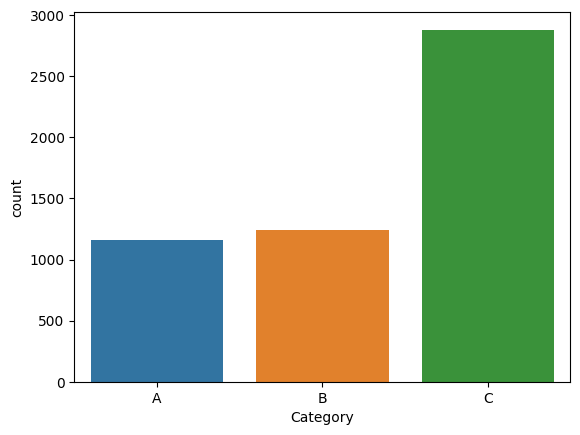

In [15]:
sns.countplot(x='Category', data=a)

<Axes: xlabel='Category', ylabel='total_sales'>

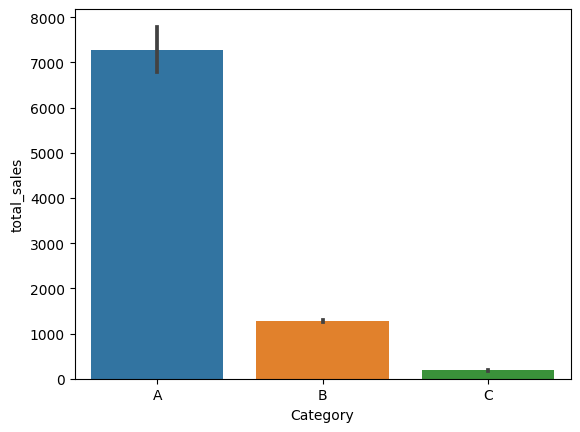

In [16]:
sns.barplot(x='Category', y='total_sales', data=a)

In [20]:
#### multi creteria abc analysis

b = inv.productmix(grouped['Description'], grouped['total_sales'], grouped['total_revenue'])
b.columns
b.product_mix.value_counts()

product_mix
C_C    2394
A_A     775
B_B     632
C_B     413
B_C     325
A_B     317
B_A     288
C_A      74
A_C      65
Name: count, dtype: int64

In [24]:
b.columns


Index(['skus', 'sales', 'revenue', 'sales_mix', 'comulative_sales',
       'revenue_mix', 'comulative_revenue', 'sales_category',
       'revenue_category', 'product_mix'],
      dtype='object')

<Axes: xlabel='product_mix', ylabel='count'>

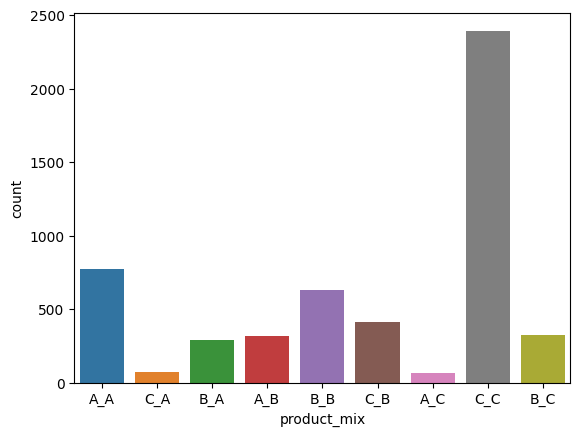

In [21]:
sns.countplot(x='product_mix',data=b)

<Axes: xlabel='product_mix', ylabel='sales'>

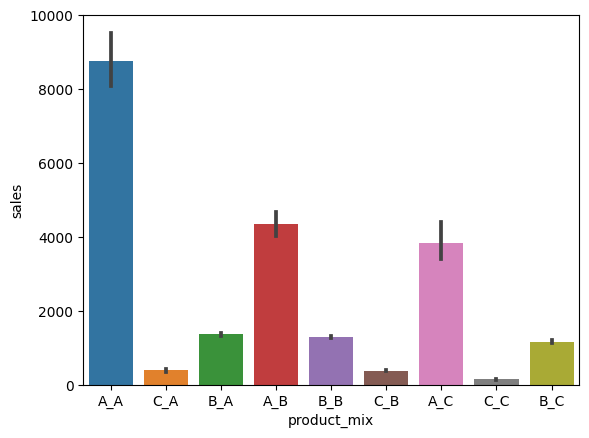

In [23]:
sns.barplot(x='product_mix',y='sales',data=b)

<Axes: xlabel='product_mix', ylabel='revenue'>

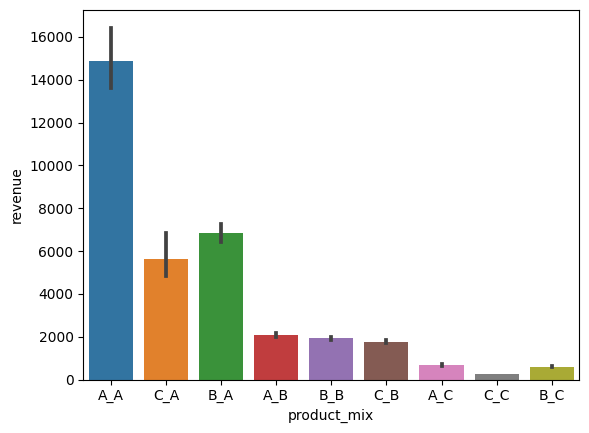

In [25]:
sns.barplot(x='product_mix',y='revenue',data=b)

In [27]:
### manipulation of data to muti-createria
by_store = retail_clean.groupby(['Country','Description']).agg(total_sales=('Quantity',np.sum),
                                                    total_revenue = ('Revenue',np.sum)).reset_index()

In [29]:
mix_country = inv.productmix_storelevel(by_store['Description'],
                          by_store['total_sales'],
                          by_store['total_revenue'],
                          by_store['Country'])

/Users/bryhansalazar/Documents/workspace-python/supply-chain-data-science-project/venv/lib/python3.11/site-packages/inventorize3/__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['sales_mix']= store['sales']/sum(store['sales'])
/Users/bryhansalazar/Documents/workspace-python/supply-chain-data-science-project/venv/lib/python3.11/site-packages/inventorize3/__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['sales_mix']= store['sales']/sum(store['sales'])
/Users/bryhansal

In [31]:
mix_country.columns

Index(['sku', 'sales', 'revenue', 'storeofsku', 'sales_mix',
       'comulative_sales', 'revenue_mix', 'comulative_revenue',
       'sales_category', 'revenue_category', 'product_mix'],
      dtype='object')

In [34]:
product_mix = mix_country.groupby(['storeofsku','product_mix']).count().reset_index().iloc[:,0:3]

In [35]:
product_mix[product_mix.storeofsku == 'Australia']

,storeofsku,product_mix,sku
0,Australia,A_A,176
1,Australia,A_B,79
2,Australia,A_C,7
3,Australia,B_A,76
4,Australia,B_B,104
5,Australia,B_C,26
6,Australia,C_A,8
7,Australia,C_B,59
8,Australia,C_C,298
